# **Домашнее задание 2: Градиентный спуск (pro)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание - 10.

## Часть 1 (теоретическая)

## Задание 1 (**1.5 балла**)

В случае одномерной Ridge-регрессии минимизируется функция со штрафом:
$$Q(w) = (y-xw)^T(y-xw)+\lambda w^2,$$
где $\lambda$ - положительный параметр, штрафующий функцию за слишком большие значения $w$.

1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.

2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

1) Найдем производную $\nabla_w Q(w)$:

$$Q(w) = (y - xw)^T(y-xw)+\lambda w^2$$
$$\nabla_w Q(w) = - x(y-xw)-x(y-xw)+2\lambda w$$
$$\nabla_w Q(w) = -2x(y-xw)+2\lambda w$$
$$\nabla_w Q(w) = -2xy+2x^Txw+2\lambda w$$

2) Найдем производную $\nabla_w^2 Q(w)$:

$$\nabla_w Q(w) = -2xy+2x^Txw+2\lambda w$$
$$\nabla_w^2 Q(w) = 2(x^Tx+\lambda)$$

3) Шаг градиентного спуска в матричном виде:

$$w^{(t+1)} = w^{(t)} - \eta \times \nabla_w Q(w^{(t)})$$

$$
\begin{bmatrix} w_1^{(t+1)} \\ ... \\ w_n^{(t+1)} \\ \end{bmatrix} = \begin{bmatrix} w_1^{(t)} \\ ... \\ w_n^{(t)} \\ \end{bmatrix} - \eta \times \begin{bmatrix} \frac{\partial Q(w^{(t)})}{\partial w_1} \\ ... \\ \frac{\partial Q(w^{(t)})}{\partial w_n} \\ \end{bmatrix}
$$


## Часть 2 (практическая).

## Задание 2 (**1 балл**)

Дана функция: $$f(x) = x\cdot sin(5x) + 0.1 \cdot x^2$$

Для этой функции:

- [ ] Реализуйте (или возьмите рассмотренный на занятии) метод градиетного спуска с условием остановки `stop=1e^-6` и шагом `eta=0.001`. **Градиетный спуск обязательно должен сохранять траекторию движения.**
- [ ] Задайте стартовые точки x0, равные 0, 0.5, 1
- [ ] Реализуйте нахождение точек минимума и максимума функции $f(x)$ (для нахождения максимума нам нужно в направлении градиента, а не антиградиента)
- [ ] Проанализируйте результаты. Предположите, с чем они связаны. Ответьте на вопросы:
    - Чему равны значения экстремумов?
    - При старте из какой начальной точки найденные экстремумы совпадут?




In [1]:
!pip install sympy

In [2]:
import sympy as sp
import numpy as np
from math import sin, cos

In [41]:
# Функция
def f_example(x):
    return x * sin(5 * x) + 0.1 * x**2

# Производная функции
def df_example(x):
    return sin(5 * x) + 5 * x * cos(5 * x) + 0.2 * x

# Градиентный спуск
def gradient_descent(f_example, df_example, x0, eta, max_iter, tol, maximize):
    x_old = x0 #инициализируем x
    path = dict() #словарь для отслеживания изменения значения x и значения функции f_example при нем

    for i in range(max_iter): #итерируемся заданное кол-во раз

        grad = df_example(x_old) #считаем градиент при текущем значении x

        if maximize: #если ищем точку максимума
            grad = -grad

        x_new = x_old - eta * grad #обновляем x
        path[f"Iteration {i}"] = [x_new, f_example(x_new)] #добавляем обновленное значение x в список

        if abs(x_new - x_old) < tol: #критерий остановы
            return x_new, f_example(x_new), path
        x_old = x_new

    return x_new, f_example(x_new), path

In [42]:
extr0, f_example0, path0 = gradient_descent(f_example, df_example, x0=0, eta=0.001, max_iter=1000, tol=1e-6, maximize=False)
print(extr0, f_example0, path0)

extr05, f_example05, path05 = gradient_descent(f_example, df_example, x0=0.5, eta=0.001, max_iter=1000, tol=1e-6, maximize=False)
print(extr05, f_example05, path05)

extr1, f_example1, path1 = gradient_descent(f_example, df_example, x0=1, eta=0.001, max_iter=1000, tol=1e-6, maximize=False)
print(extr1, f_example1, path1)

0.0 0.0 {'Iteration 0': [0.0, 0.0]}
0.9750618695937243 -0.867075346695141 {'Iteration 0': [0.5013043868947634, 0.3225216394855321], 'Iteration 1': [0.50262871628548, 0.3207543896802287], 'Iteration 2': [0.5039732826996968, 0.31893272461148636], 'Iteration 3': [0.505338383290982, 0.3170550031569289], 'Iteration 4': [0.506724317730896, 0.3151195404466621], 'Iteration 5': [0.5081313880904593, 0.3131246072515476], 'Iteration 6': [0.509559898710535, 0.31106842941478996], 'Iteration 7': [0.5110101560605197, 0.3089491873325477], 'Iteration 8': [0.5124824685847187, 0.3067650154897043], 'Iteration 9': [0.5139771465357561, 0.30451400205735746], 'Iteration 10': [0.5154945017943534, 0.3021941885590524], 'Iteration 11': [0.5170348476747887, 0.2998035696132472], 'Iteration 12': [0.5185984987153273, 0.2973400927599925], 'Iteration 13': [0.5201857704529, 0.2948016583803063], 'Iteration 14': [0.5217969791812841, 0.2921861197172545], 'Iteration 15': [0.5234324416920272, 0.28949128300826676], 'Iteration 

In [43]:
minimum_point, _, _ = gradient_descent(f_example, df_example, x0=0, eta=0.001, max_iter=1000, tol=1e-6, maximize=False)
print("Минимум при x0=0:", minimum_point)

maximum_point, _, _ = gradient_descent(f_example, df_example, x0=0, eta=0.001, max_iter=1000, tol=1e-6, maximize=True)
print("Максимум при x0=0:", maximum_point)

minimum_point, _, _ = gradient_descent(f_example, df_example, x0=0.5, eta=0.001, max_iter=1000, tol=1e-6, maximize=False)
print("Минимум при x0=0.5:", minimum_point)

maximum_point, _, _ = gradient_descent(f_example, df_example, x0=0.5, eta=0.001, max_iter=1000, tol=1e-6, maximize=True)
print("Максимум при x0=0.5:", maximum_point)

minimum_point, _, _ = gradient_descent(f_example, df_example, x0=1, eta=0.001, max_iter=1000, tol=1e-6, maximize=False)
print("Минимум при x0=1:", minimum_point)

maximum_point, _, _ = gradient_descent(f_example, df_example, x0=1, eta=0.001, max_iter=1000, tol=1e-6, maximize=True)
print("Максимум при x0=1:", maximum_point)

Минимум при x0=0: 0.0
Максимум при x0=0: 0.0
Минимум при x0=0.5: 0.9750618695937243
Максимум при x0=0.5: 0.4118560303525929
Минимум при x0=1: 0.975136654257011
Максимум при x0=1: 1.6035302917890968


## Задание 3 (**0.5 балла**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

In [222]:
def ols_solution(X, y):
    # X = np.hstack((np.ones((X.shape[0], 1)), X)) #добавили колонну единиц слева к матрице X
    return np.linalg.inv(X.T @ X) @ X.T @ y

## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [168]:
# Функция потерь
def f_SGD(X, w_curr, y):
    m = len(y)
    return (1./m) * (np.linalg.norm(X @ w_curr - y) ** 2)

In [239]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=1000):

    # X = np.hstack((np.ones((X.shape[0], 1)), X)) #добавили колонну единиц слева к матрице X

    w_curr = np.random.rand(X.shape[1]) #инициализировали рандомный набор весов

    m = X.shape[0] #кол-во рядов в X

    cost_track = np.zeros((iterations,1)) #массив для отслеживания изменения значения функции f_SGD при новом наборе весов w_new

    for i in range(iterations): #итерируемся заданным числом итераций

      idx = np.random.randint(0, m) #выбираем случайный объект из X и y
      x_i = X[idx]#.iloc[idx].values
      y_i = y[idx]

      grad = 2 * x_i * ((x_i @ w_curr) - y_i) #градиент функции f_SGD

      w_new = w_curr - learning_rate * grad #обновляем набор весов

      cost_track[i] = f_SGD(X, w_new, y) #добавляем обновленное значение функции f_SGD при новом наборе весов w_new в список

      w_curr = w_new

    return w_curr, cost_track

## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию на данных, сгенерированных ниже, тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**):

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации.

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [171]:
# Функция потерь
def f_GD(X, w_curr, y):
    m = len(y)
    return (1./m) * (np.linalg.norm(X @ w_curr - y) ** 2)

In [240]:
#Скопирован из семинара и адаптирован
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):

    # X = np.hstack((np.ones((X.shape[0], 1)), X)) #добавили колонну единиц слева к матрице X

    w_curr = np.random.rand(X.shape[1]) #инициализировали рандомный набор весов

    m = X.shape[0] #кол-во рядов в X

    cost_track = np.zeros((iterations,1)) #массив для отслеживания изменения значения функции f_GD при новом наборе весов w_new

    for i in range(iterations): #итерируемся заданным числом итераций

        grad = 2./m * X.T @ ((X @ w_curr) - y) #градиент функции f_SGD

        w_new = w_curr - learning_rate * grad #обновляем набор весов

        cost_track[i] = f_GD(X, w_new, y) #добавляем обновленное значение функции f_GD при новом наборе весов w_new в список

        w_curr = w_new

    return w_curr, cost_track

In [225]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

X, y, _ = make_regression(n_samples=100000,#number of samples
                          n_features=10,#number of features
                          n_informative=8,#number of useful features
                          noise=100,#bias and standard deviation of the guassian noise
                          coef=True,#true coefficient used to generated the data
                          random_state=123)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01
X = np.hstack((np.ones((X.shape[0], 1)), X)) #добавили колонну единиц слева к матрице X

In [226]:
from sklearn.metrics import r2_score
import time

def predict(X, w):
    return X @ w

In [227]:
np.set_printoptions(suppress=True, precision=4)

In [228]:
time_start = time.time()
w_ols = ols_solution(X, y)
time_end = time.time()
time_ols = time_end - time_start

In [248]:
print(time_ols)
print(np.array(w_ols))

0.04248499870300293
[ -0.5217  56.825   33.4772  -0.235   39.6462  -0.1297  48.9961  82.994
 111.1962  79.2039  42.4712 -16.8166]


In [249]:
r2_ols = r2_score(y, predict(X, w_ols))
print(r2_ols)

0.7547269115538395


In [241]:
time_start = time.time()
w_GD, cost_track_GD = gradient_descent(X, y)
time_end = time.time()
time_GD = time_end - time_start

In [242]:
print(time_GD)
print(np.array(w_GD))

3.730557680130005
[-0.5222 56.8246 33.4829 -0.2407 39.6453 -0.1359 49.123  13.8527 42.8284
 79.2039 42.4712 55.7917]


In [245]:
r2_GD = r2_score(y, predict(X, w_GD))
print(r2_GD)

0.7554626185750483


In [243]:
time_start = time.time()
w_SGD, cost_track_SGD = stochastic_gradient_descent(X, y)
time_end = time.time()
time_SGD = time_end - time_start

In [244]:
print(time_SGD)
print(np.array(w_SGD))

1.0826900005340576
[-2.3919 78.8738 44.6812 -0.8879 41.9349 -3.8367 54.7697 -2.985  44.9327
 78.6652 36.0539 41.3188]


In [246]:
r2_SGD = r2_score(y, predict(X, w_SGD))
print(r2_SGD)

0.7103352266953059


### Ответы:
1. Все методы справились с нахождением минимума, но не все нашли самое оптимальное решение. SGD известен тем, что делает расчет намного быстрее стандартного GD, жертвуя точностью в нахождении минимума.

2. Время выполнения каждой функции:
- OLS_solution - 0.09 секунд
- gradient_descent - 56.00 секунд
- stochastic_gradient_descent - 8.04 секунд

3. (ниже)

4. gradient_descent дал лучший результат из всех трех методов:
- OLS_solution: $R^2 = 0.754727$
- gradient_descent: $R^2 = 0.755463$
- stochastic_gradient_descent: $R^2 = 0.710335$

In [251]:
from matplotlib import pyplot as plt

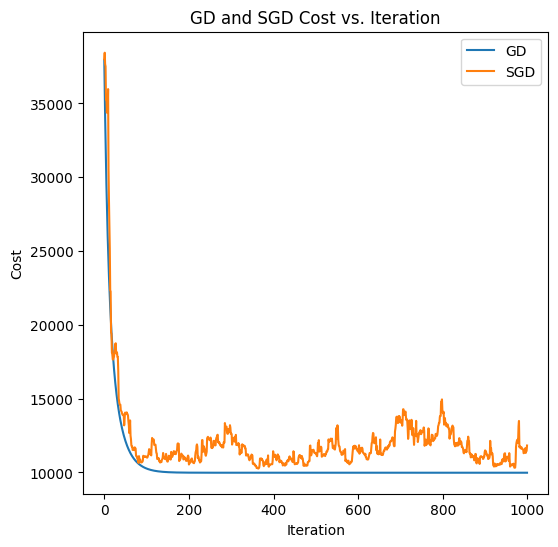

In [265]:
plt.figure(figsize=(6,6))
plt.plot(cost_track_GD, label='GD')
plt.plot(cost_track_SGD, label='SGD')
plt.title('GD and SGD Cost vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

## Задание 7 (1.5 балла).

* **(0.5 балла)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему?

In [270]:
# Функция потерь
def f_SGD_reg(X, w_curr, y, alpha):
    m = len(y)
    return (1./m) * (np.linalg.norm(X @ w_curr - y) ** 2) + alpha * np.linalg.norm(w_curr) ** 2

In [273]:
def stochastic_gradient_descent_reg(X, y, alpha, learning_rate=0.01, iterations=1000):

    # X = np.hstack((np.ones((X.shape[0], 1)), X)) #добавили колонну единиц слева к матрице X

    w_curr = np.random.rand(X.shape[1]) #инициализировали рандомный набор весов

    m = X.shape[0] #кол-во рядов в X

    cost_track = np.zeros((iterations,1)) #массив для отслеживания изменения значения функции f_SGD при новом наборе весов w_new

    for i in range(iterations): #итерируемся заданным числом итераций

      idx = np.random.randint(0, m) #выбираем случайный объект из X и y
      x_i = X[idx]#.iloc[idx].values
      y_i = y[idx]

      grad = 2 * x_i * ((x_i @ w_curr) - y_i) + 2 * alpha * w_curr  #градиент функции f_SGD

      w_new = w_curr - learning_rate * grad #обновляем набор весов

      cost_track[i] = f_SGD_reg(X, w_new, y, alpha) #добавляем обновленное значение функции f_SGD при новом наборе весов w_new в список

      w_curr = w_new

    return w_curr, cost_track

In [276]:
for alpha in np.arange(0.1, 1.1, 0.1):
    w_SGD_reg, cost_track_SGD_reg = stochastic_gradient_descent_reg(X, y, alpha)
    r2_SGD_reg = r2_score(y, predict(X, w_SGD_reg))
    print(f"Alpha: {alpha}, Rˆ2: {r2_SGD_reg}")

Alpha: 0.1, Rˆ2: 0.724876751328126
Alpha: 0.2, Rˆ2: 0.7372820367921542
Alpha: 0.30000000000000004, Rˆ2: 0.7305880892564478
Alpha: 0.4, Rˆ2: 0.6671241302034292
Alpha: 0.5, Rˆ2: 0.7174776962811403
Alpha: 0.6, Rˆ2: 0.6616565184956424
Alpha: 0.7000000000000001, Rˆ2: 0.6808722872838125
Alpha: 0.8, Rˆ2: 0.614961530903875
Alpha: 0.9, Rˆ2: 0.59913719947685
Alpha: 1.0, Rˆ2: 0.5250945261673972


Лучшее значение $R^2$ получилось при $\alpha = 0.2$ - 0.737282. При $\alpha > 0.5$ качество модели начинает заметно снижаться, что говорит об умешающемся влиянии признаков на предсказание и, как следствие, происходит недообучение.

## Задание 8 (2 балла)

Реализуйте на выбор одну из оптимизаций градиентного спуска - Momentum или  AdaGrad. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [279]:
def momentum_gradient_descent(X, y, learning_rate, iterations, alpha): # добавьте в аргументы также специфические для метода оптимизации гиперпараметры

    w_curr = np.random.rand(X.shape[1]) #инициализировали рандомный набор весов

    m = X.shape[0] #кол-во рядов в X

    cost_track = np.zeros((iterations,1)) #массив для отслеживания изменения значения функции f_GD при новом наборе весов w_new

    h_curr=0

    for i in range(iterations): #итерируемся заданным числом итераций

        grad = 2./m * X.T @ ((X @ w_curr) - y) #градиент функции f_SGD

        h_new = alpha * h_curr + learning_rate * grad #вектор инерции

        w_new = w_curr - h_new #обновляем набор весов

        cost_track[i] = f_GD(X, w_new, y) #добавляем обновленное значение функции f_GD при новом наборе весов w_new в список

        w_curr = w_new

    return w_curr, cost_track

In [280]:
w_GD_mom, cost_track_GD_mom = momentum_gradient_descent(X, y, learning_rate=0.01, iterations=1000, alpha=0.9)
r2_GD_mom = r2_score(y, predict(X, w_GD_mom))
print(r2_GD_mom)

0.7554626185750483


In [291]:
def adagrad_gradient_descent(X, y, learning_rate, iterations, epsilon): # добавьте в аргументы также специфические для метода оптимизации гиперпараметры

    w_curr = np.random.rand(X.shape[1]) #инициализировали рандомный набор весов

    m = X.shape[0] #кол-во рядов в X

    cost_track = np.zeros((iterations,1)) #массив для отслеживания изменения значения функции f_GD при новом наборе весов w_new

    G_curr = np.zeros_like(w_curr)

    for i in range(iterations): #итерируемся заданным числом итераций

        grad = 2./m * X.T @ ((X @ w_curr) - y) #градиент функции f_SGD

        G_new = G_curr + grad ** 2

        w_new = w_curr - (learning_rate / (np.sqrt(G_new + epsilon))) * grad #обновляем набор весов

        cost_track[i] = f_GD(X, w_new, y) #добавляем обновленное значение функции f_GD при новом наборе весов w_new в список

        w_curr = w_new
        G_curr = G_new

    return w_curr, cost_track

In [298]:
w_GD_adagrad, cost_track_GD_adagrad = adagrad_gradient_descent(X, y, learning_rate=0.01, iterations=5000, epsilon=1e-8)
r2_GD_adagrad = r2_score(y, predict(X, w_GD_adagrad))
print(r2_GD_adagrad)

0.061111616972439387


In [301]:
w_GD_adagrad, cost_track_GD_adagrad = adagrad_gradient_descent(X, y, learning_rate=0.5, iterations=5000, epsilon=1e-4)
r2_GD_adagrad = r2_score(y, predict(X, w_GD_adagrad))
print(r2_GD_adagrad)

0.7377596380280625


In [295]:
w_GD_adagrad, cost_track_GD_adagrad = adagrad_gradient_descent(X, y, learning_rate=0.1, iterations=10000, epsilon=1e-8)
r2_GD_adagrad = r2_score(y, predict(X, w_GD_adagrad))
print(r2_GD_adagrad)

0.46408109850691515


In [297]:
w_GD_adagrad, cost_track_GD_adagrad = adagrad_gradient_descent(X, y, learning_rate=0.5, iterations=5000, epsilon=1e-8)
r2_GD_adagrad = r2_score(y, predict(X, w_GD_adagrad))
print(r2_GD_adagrad)

0.7384673044247382


### Попробовал разные

## Бонус

## Задание 9 (0.5 балла)

Существует [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Известно, что методы второго порядка точнее, чем методы первого порядка (то есть те, которые используют только первую производную для оптимизации). Как вы думаете, почему в оптимизации функций потерь все формулы используют только производные первого порядка? Почему не используют метод Ньютона?

`Ваш ответ здесь`

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/qxjz2tp)